In [2]:
import torch
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

In [1]:
SAVE_PATH = '/home/sever2users/Desktop/Animesh-Renanse/RNN CONTROLLER/SavedModels/RNNMatNTM_AssRec1/Train6Duplicate'

In [3]:
trace = torch.load(SAVE_PATH+"/LossTrace.pth")['TrainBSE']

(0.0, 200000.0)

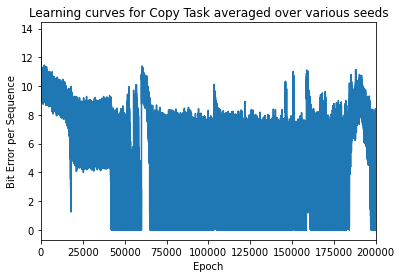

In [4]:
plt.plot(trace)
plt.ylabel("Bit Error per Sequence")
plt.xlabel("Epoch")
plt.title("Learning curves for Copy Task averaged over various seeds")
plt.xlim([0,200000])

(0.0, 200000.0)

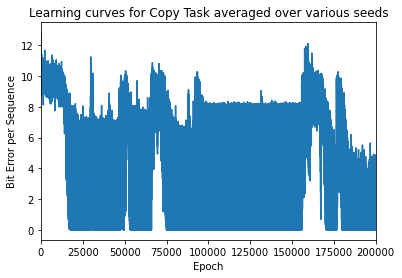

In [885]:
plt.plot(trace)
plt.ylabel("Bit Error per Sequence")
plt.xlabel("Epoch")
plt.title("Learning curves for Copy Task averaged over various seeds")
plt.xlim([0,200000])


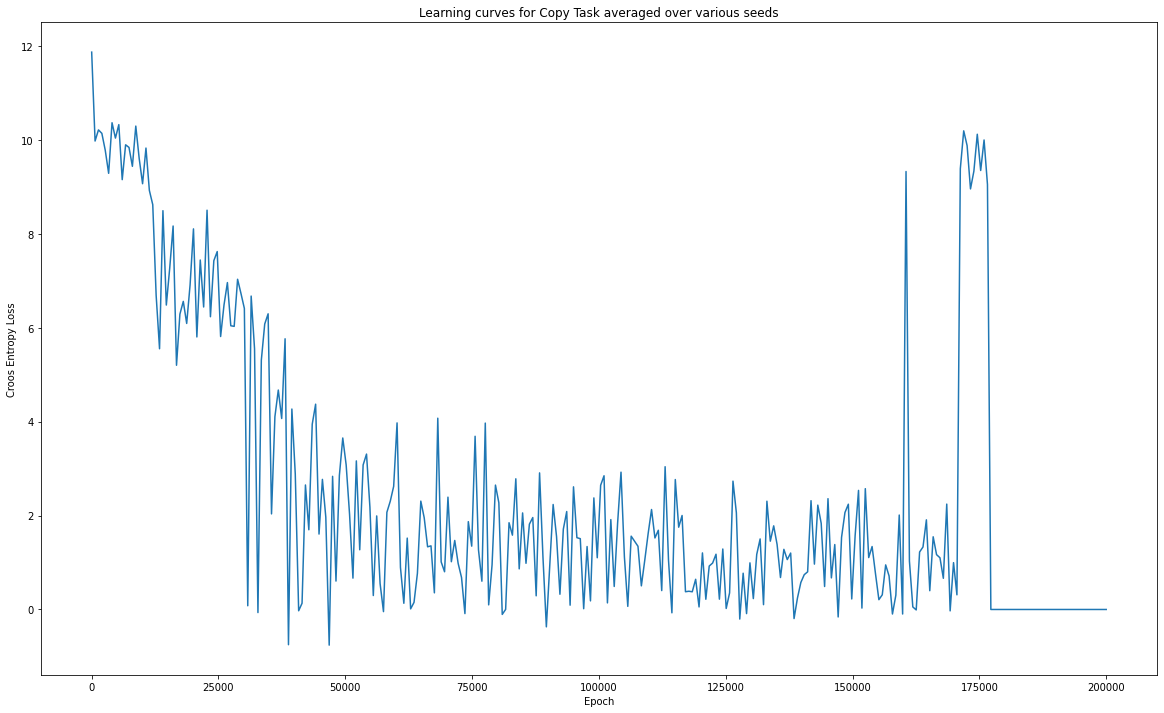

<Figure size 432x288 with 0 Axes>

In [93]:
T = torch.arange(start=0,end=200000)
power = trace[:200000]
# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 300) 

spl = make_interp_spline(T,power, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.figure(figsize=(20,12))

plt.plot(xnew, power_smooth)

#plt.ylim([-0.05,1])

plt.ylabel("Croos Entropy Loss")
plt.xlabel("Epoch")
plt.title("Learning curves for Copy Task averaged over various seeds")
plt.show()
plt.savefig('COpyTaskBSE4.png')

# Eigenvalue analysis of MatNTM Recurrent Weights

In [410]:
import scipy.interpolate

In [362]:
path = '/home/sever2users/Desktop/Animesh-Renanse/RNN CONTROLLER/SavedModels/RNNMatNTM_Copy1/Train5/MNTM.pth'

In [364]:
mntm = torch.load(path)

In [451]:
U = mntm.Controller.RNN.state_dict()['1.Connections.Up'].detach().clone().cpu()

In [452]:
#U = np.random.randn(30,30)

In [453]:
np.absolute(np.linalg.eigvals(U))

array([1.9126928 , 1.9126928 , 1.7613772 , 1.7613772 , 1.5519509 ,
       1.5519509 , 1.4018786 , 1.4018786 , 1.3679304 , 1.264612  ,
       1.264612  , 1.1514657 , 1.1514657 , 1.1066015 , 1.0532278 ,
       1.2166971 , 1.2166971 , 1.0920846 , 1.0920846 , 1.4337835 ,
       1.4337835 , 0.59390724, 0.59390724, 1.064661  , 1.064661  ,
       0.9068402 , 0.46601418, 0.46601418, 0.57304025, 0.57304025],
      dtype=float32)

In [454]:
a = np.linalg.eigvals(U)
real = []
imag = []
for val in a:
    real.append(val.real)
    imag.append(val.imag)

In [455]:
a = np.linalg.eigvals(U)

In [456]:
a[0].imag

1.9077512

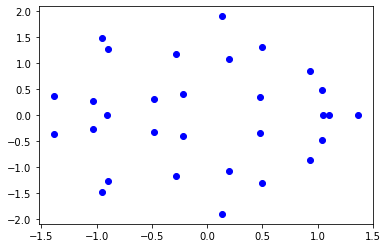

In [457]:
plt.plot(real,imag,'bo')

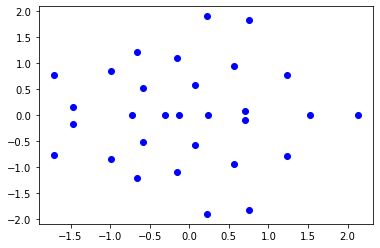

In [400]:
plt.plot(real,imag,'bo')

In [848]:
torch.randn([5,5])*1e-3

tensor([[-2.1053e-03, -6.1908e-04,  4.6363e-04, -4.2402e-04, -5.7096e-04],
        [-1.0872e-03,  1.1110e-03,  3.3672e-04,  7.5425e-04, -1.4521e-03],
        [-9.5615e-04, -4.3611e-04,  1.1121e-03, -6.1445e-06,  1.2143e-03],
        [ 1.1581e-03,  3.3045e-04,  1.8622e-03,  6.2696e-04,  9.2865e-04],
        [ 1.3851e-04,  1.0479e-03, -4.8816e-04,  1.1963e-03,  1.1178e-03]])